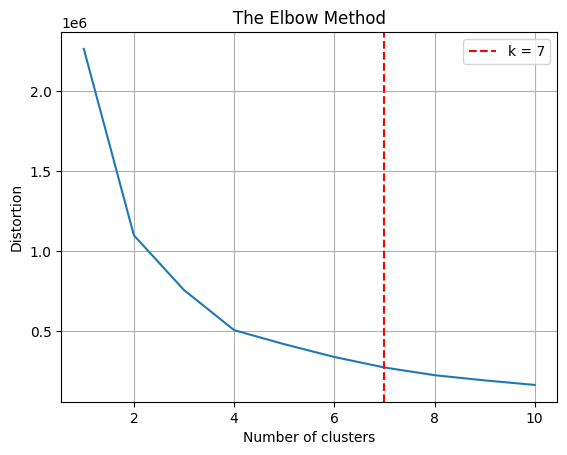

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


['LOS ANGELES AMBULATORY CARE CENTER'] ['351 E TEMPLE ST']


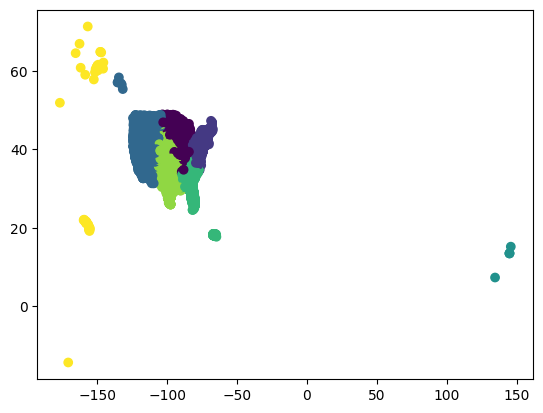

In [16]:
#importing necessary modules
import pandas as pd

from sklearn.cluster import KMeans
import folium

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



df = pd.read_csv("data2.csv")
df.head()

X = df[['LATITUDE','LONGITUDE']]
X.head

X.head()
#-----------------------Elbow method to find the optimum number of clusters--------------------#
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

#-------------------------Elbow plot---------------------------#
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()


#------------------------------------KMeans model with obtained k----------------------#
model=KMeans(n_clusters=k)
y_kmeans=model.fit_predict(X)
df['y']=y_kmeans

plt.scatter(df['LONGITUDE'],df['LATITUDE'],c=df['y'])

#------------plotting cluster points in the map using Folium-----------------------------------#

#dividing location points into clusters
df=df[:3000]
cl1=df[['LATITUDE','LONGITUDE']][df["y"]==0].values.tolist()
cl2=df[['LATITUDE','LONGITUDE']][df["y"]==1].values.tolist()
cl3=df[['LATITUDE','LONGITUDE']][df["y"]==2].values.tolist()
cl4=df[['LATITUDE','LONGITUDE']][df["y"]==3].values.tolist()
cl5=df[['LATITUDE','LONGITUDE']][df["y"]==4].values.tolist()
cl6=df[['LATITUDE','LONGITUDE']][df["y"]==5].values.tolist()
cl7=df[['LATITUDE','LONGITUDE']][df["y"]==6].values.tolist()

#making folium map
map=folium.Map(location=[36.33616, -119.646])


#plotting cluster points with color code
for i in cl1:
  folium.CircleMarker(i,radius=2,color='blue',fill_color='lightblue').add_to(map)
for i in cl2:
  folium.CircleMarker(i,radius=2,color='red',fill_color='lightred').add_to(map)
for i in cl3:
  folium.CircleMarker(i,radius=2,color='green',fill_color='lightgreen').add_to(map)
for i in cl4:
  folium.CircleMarker(i,radius=2,color='brown',fill_color='lightbrown').add_to(map)
for i in cl5:
  folium.CircleMarker(i,radius=2,color='orange',fill_color='lightorange').add_to(map)
for i in cl6:
  folium.CircleMarker(i,radius=2,color='black',fill_color='lightblack').add_to(map)  
for i in cl7:
  folium.CircleMarker(i,radius=2,color='violet',fill_color='lightviolet').add_to(map)
  
#-------------------------------------------------------------------------------------------#

#--------------------getting nearest hospital from user location-----------------------------#

#change values of user location here to get the nearest hospital
user_loc=np.array([34.052235,-118.243683])
new_point_cluster = model.predict(user_loc.reshape(1, -1))



# Find the point in the cluster closest to the new point
cluster_points = X[model.labels_ == new_point_cluster]
closest_point = cluster_points.iloc[np.argmin(np.linalg.norm(cluster_points - user_loc, axis=1))]
hospital = df[(df['LATITUDE'] == closest_point[0]) & (df['LONGITUDE'] == closest_point[1])]['NAME'].values
address=df[(df['LATITUDE'] == closest_point[0]) & (df['LONGITUDE'] == closest_point[1])]['ADDRESS'].values
#nearest hospital to the user location and its address
print(hospital ,address)

map